# Demographic Prisoner's Dilemma (Taken from MESA examples)

The Demographic Prisoner's Dilemma is a family of variants on the classic two-player [Prisoner's Dilemma](https://en.wikipedia.org/wiki/Prisoner's_dilemma), first developed by [Joshua Epstein](https://onlinelibrary.wiley.com/doi/10.1002/(SICI)1099-0526(199811/12)4:2%3C36::AID-CPLX9%3E3.0.CO;2-Z). The model consists of agents, each with a strategy of either Cooperate or Defect. Each agent's payoff is based on its strategy and the strategies of its spatial neighbors. After each step of the model, the agents adopt the strategy of their neighbor with the highest total score. 

The specific variant presented here is adapted from the [Evolutionary Prisoner's Dilemma](http://ccl.northwestern.edu/netlogo/models/PDBasicEvolutionary) model included with NetLogo. Its payoff table is a slight variant of the traditional PD payoff table:

<table>
    <tr><td></td><td>**Cooperate**</td><td>**Defect**</td></tr>
    <tr><td>**Cooperate**</td><td>1, 1</td><td>0, *D*</td></tr>
    <tr><td>**Defect**</td><td>*D*, 0</td><td>0, 0</td></tr>
</table>

Where *D* is the defection bonus, generally set higher than 1. In these runs, the defection bonus is set to $D=1.6$.

The Demographic Prisoner's Dilemma demonstrates how simple rules can lead to the emergence of widespread cooperation, despite the Defection strategy dominiating each individual interaction game. However, it is also interesting for another reason: it is known to be sensitive to the activation regime employed in it.

Below, we demonstrate this by instantiating the same model (with the same random seed) three times, with three different activation regimes: 

* Sequential activation, where agents are activated in the order they were added to the model;
* Random activation, where they are activated in random order every step;
* Simultaneous activation, simulating them all being activated simultaneously.



In [8]:
from pd_grid.model import PdGrid

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec

%matplotlib inline

## Helper functions

In [9]:
bwr = plt.get_cmap("bwr")


def draw_grid(model, ax=None):
    """
    Draw the current state of the grid, with Defecting agents in red
    and Cooperating agents in blue.
    """
    if not ax:
        fig, ax = plt.subplots(figsize=(6, 6))
    grid = np.zeros((model.grid.width, model.grid.height))
    
    for agent, pos in model.grid.coord_iter():
        if agent.move == "D":
            grid[pos[1]][pos[0]] = 1
        else:
            grid[pos[1]][pos[0]] = 0
    ax.pcolormesh(grid, cmap=bwr, vmin=0, vmax=1)
    ax.axis("off")
    ax.set_title("Steps: {}".format(model.schedule.steps))

In [10]:
def run_model(model):
    """
    Run an experiment with a given model, and plot the results.
    """
    fig = plt.figure(figsize=(12, 8))

    ax1 = fig.add_subplot(231)
    ax2 = fig.add_subplot(232)
    ax3 = fig.add_subplot(233)
    ax4 = fig.add_subplot(212)

    draw_grid(model, ax1)
    model.run(10)
    draw_grid(model, ax2)
    model.run(10)
    draw_grid(model, ax3)
    model.datacollector.get_model_vars_dataframe().plot(ax=ax4)

In [11]:
# Set the random seed
seed = 21

## Sequential Activation

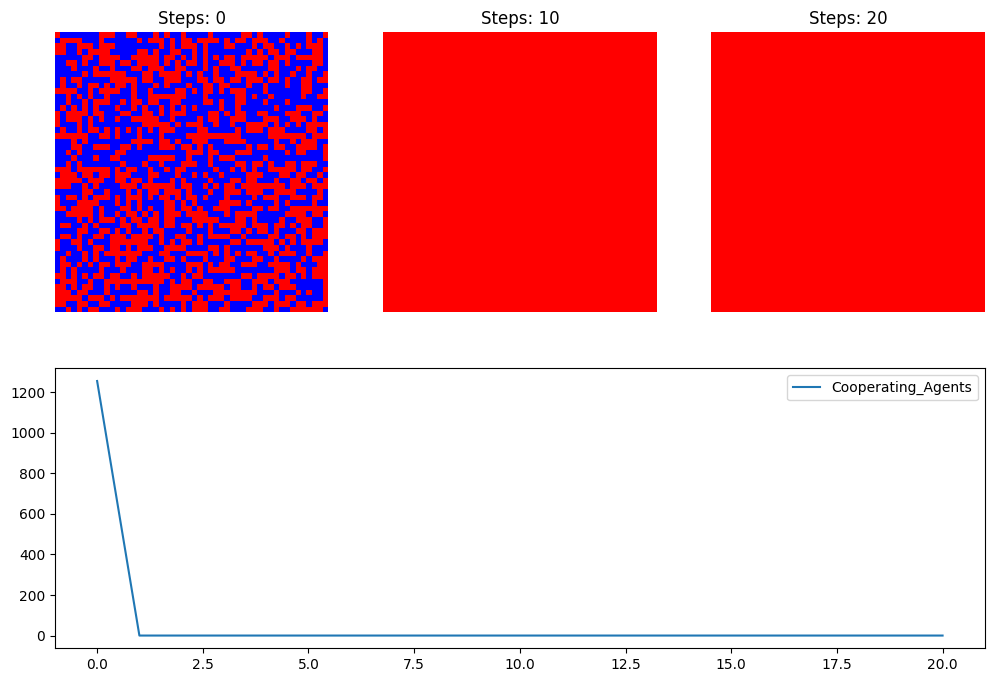

In [12]:
m = PdGrid(50, 50, "Sequential", seed=seed)
run_model(m)

## Random Activation

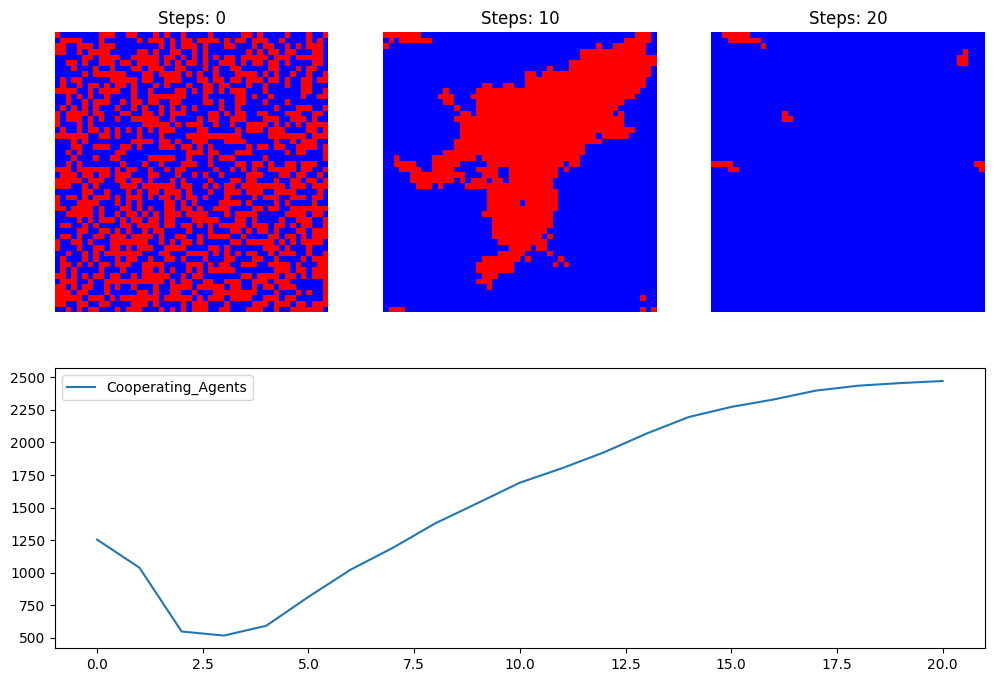

In [13]:
m = PdGrid(50, 50, "Random", seed=seed)
run_model(m)

## Simultaneous Activation

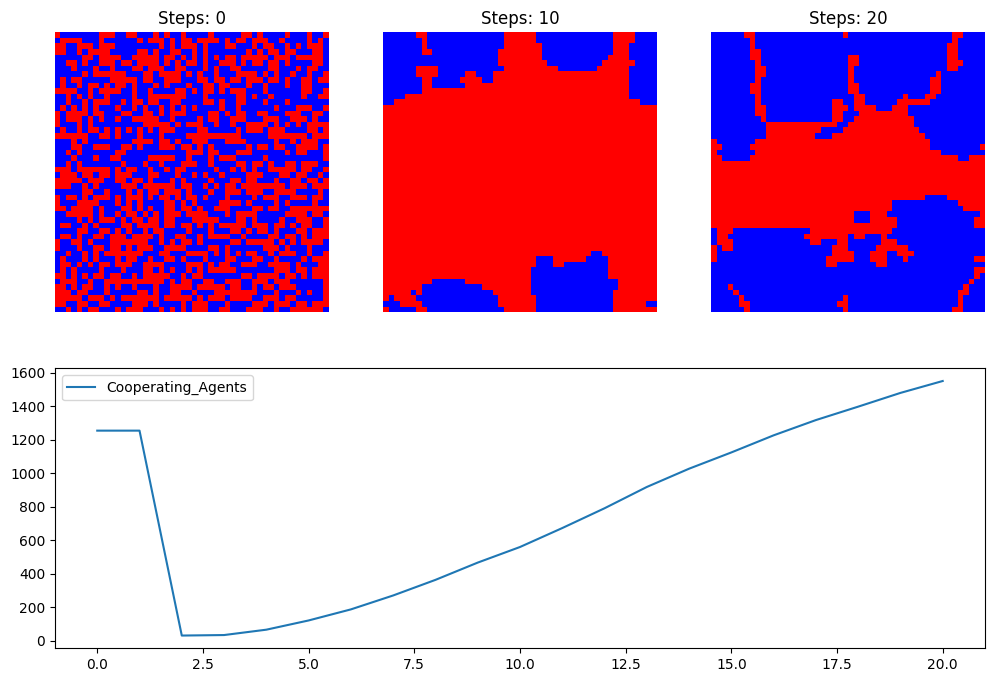

In [14]:
m = PdGrid(50, 50, "Simultaneous", seed=seed)
run_model(m)